# Swimsuit trends

The aim of this notebook is to create beautiful visualizations in order to get a better understanding of the swimsuit market. The data come from [Google trends](https://trends.google.com/trends/).

This notebook is part of a series of blog posts on time series forecasting. You can find the related article [here](https://goujonbe.github.io).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Retrieve data

The time series are stored as csv files. We can easily read them with Pandas. Let's see what we have.

In [2]:
!ls ../../data/part_1

bikini_trends.csv             swimsuit_trends.csv
one_piece_swimsuit_trends.csv


The value that represents the trend is complicated to imagine. The methodology to get that number is explained in the [google documentation](https://support.google.com/trends/answer/4365533?hl=en). It is a **scaled value** that takes into account the volume of queries in the given region. It is then a kind of a **ratio** between the topic and all the topics searched on Google.

The data we have has the following parameters:

* region: France
* time period: last 5 years

In [3]:
swimsuit_trends = pd.read_csv('../../data/part_1/swimsuit_trends.csv', skiprows=1)
swimsuit_trends.columns = ['week', 'trend']
swimsuit_trends.head()

,week,trend
0,2014-06-08,73
1,2014-06-15,77
2,2014-06-22,74
3,2014-06-29,73
4,2014-07-06,65


In [4]:
one_piece_swimsuit_trends = pd.read_csv('../../data/part_1/one_piece_swimsuit_trends.csv', skiprows=1)
one_piece_swimsuit_trends.columns = ['week', 'trend']
one_piece_swimsuit_trends.head()

,week,trend
0,2014-06-08,36
1,2014-06-15,42
2,2014-06-22,39
3,2014-06-29,34
4,2014-07-06,30


In [5]:
bikini_trends = pd.read_csv('../../data/part_1/bikini_trends.csv', skiprows=1)
bikini_trends.columns = ['week', 'trend']
bikini_trends.head()

,week,trend
0,2014-06-08,92
1,2014-06-15,97
2,2014-06-22,99
3,2014-06-29,100
4,2014-07-06,90


## Step 2: Data cleaning and preprocessing

We are lucky, the data set is clean and there soes not seem to be missing values. Let's confirm that immediately.

In [6]:
def get_count_missing_values_in_each_column(data):
    """
        Prints the count of missing values
        in each column of a pandas dataframe
    """
    print(f'Number of missing values in the data set: \n{data.isna().sum()}')

In [7]:
get_count_missing_values_in_each_column(swimsuit_trends)

Number of missing values in the data set: 
week     0
trend    0
dtype: int64


I check for the others and it is the same thing, believe me.

Now we want to transform a the data set so that the date column has a date format (current format is string) and this column will be the index. The data set is small in this case but this is usually a good practice when you manipulate time series data to set the date column as the index. It makes all the operations of selection, aggregations and so on much faster. 

In [8]:
type(swimsuit_trends)

pandas.core.frame.DataFrame

In [9]:
def get_dataframe_with_date_column_as_index(data, date_column_name, value_column_name):
    """
        Returns the original dataframe
        as a series with the date column as a DateTimeIndex
    """
    data[date_column_name] = pd.to_datetime(data[date_column_name])
    data = data.set_index(date_column_name)
    return data[value_column_name]

In [10]:
swimsuit_trends = get_dataframe_with_date_column_as_index(swimsuit_trends,
                                                          'week',
                                                          'trend')
one_piece_swimsuit_trends = get_dataframe_with_date_column_as_index(
    one_piece_swimsuit_trends,
    'week',
    'trend')
bikini_trends = get_dataframe_with_date_column_as_index(bikini_trends,
                                                        'week',
                                                        'trend')

## Step 3: Visualization

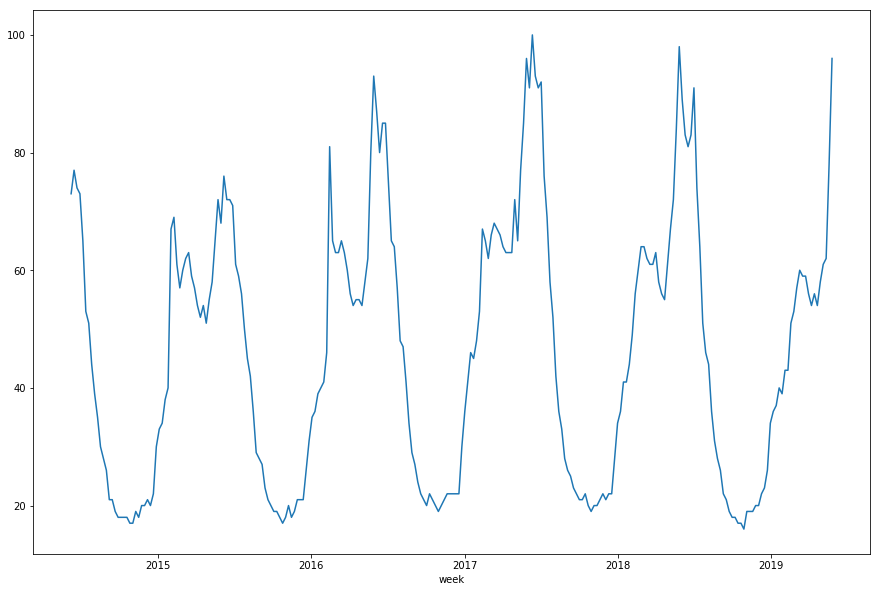

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(x=swimsuit_trends.index, y=swimsuit_trends.values)